# Exercises XP

### Exercise 1: Deep Learning vs. Traditional Machine Learning


Objective:

Understand the differences between traditional machine learning and deep learning.
Instructions:

1. Create a table comparing traditional machine learning and deep learning based on the following aspects:

    - Feature Engineering
    - Data Processing
    - Scalability
    - Pattern Discovery
    - Computational Requirements

2. Identify one real-world problem where traditional ML is better suited and one where deep learning is the superior choice.
3. Write a short paragraph (3-5 sentences) explaining why deep learning has an advantage in unstructured data processing.

_____________________

1.

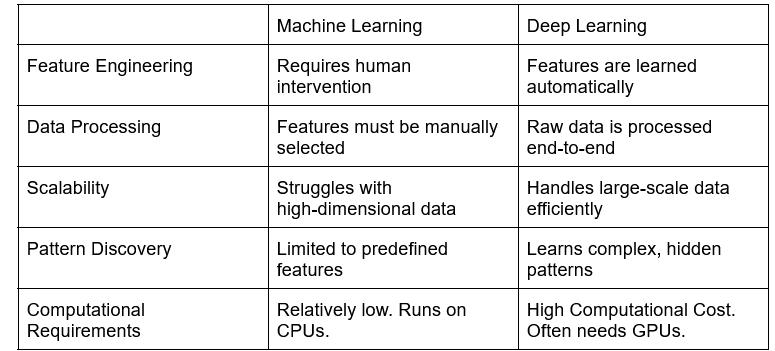

2. \

Traditional Machine Learning: \
Predicting house prices. In cases where the data is well-structured, traditional machine learning algorithms like linear regression or decision trees can be very effective.

Deep Learning: \
Image classification. Deep Learning excels in image and pattern recognition tasks, as it can automatically extract complex features from raw pixel data. For example, deep learning is great for tasks like identifying objects in images.

3. \

Deep learning is better at processing unstructured data, because it can automatically learn features from raw data. Unlike traditional machine learning, which requires manual feature extraction, deep learning models can automatically discover patterns from raw inputs. This ability to learn directly from unstructured data without relying on human input makes deep learning effective for complex tasks, such as speech recognition or image classification.

### Exercise 2: Artificial Neural Networks (ANNs)


Objective:

Identify and understand the key components of an artificial neural network.
Instructions:

1. Draw (or use a diagram tool) to create a simple artificial neural network (ANN) with:

    - An input layer (3 neurons)
    - One hidden layer (4 neurons)
    - An output layer (2 neurons)

2. Label the components of the network: neurons, weights, biases, activation function, and layers.

3. Write a short description (3-5 sentences) explaining how information flows through the network.

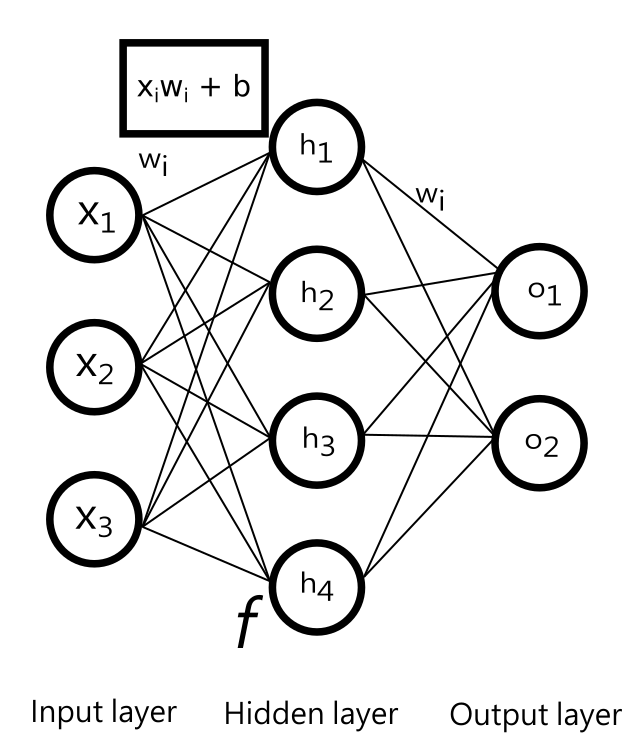

Input Layer: The network receives the input data, which is stored in the nodes $x_1 ... x_n$.

Then, for each node we calculate $z = x_i w_i + b$, where $b$ is the bias and $w_i$ are the initial random weights assigned to each input node.

We apply then an activation function $f(z)$ and this information get stored in the nodes $h_i$ from the the hidden layer.

We then calculate once again the weighted sum and store the output in the nodes $o_i$ from the output layer.

This is the forward propagation. After the first iteration, we need to calculate the loss function, modify the weights so that we move towards minimizing the loss and then start the process all over.

### Exercise 3: Creating the Dataset and Visualizing the Data


Objective: Generate a dataset with noise and visualize it.
Instructions:

1. Import the necessary libraries: numpy, matplotlib.pyplot, and mean_squared_error from sklearn.metrics.
2. Create a set of 20 points using the formula ( y = -x^2 ), adding normally distributed noise with a mean of 0 and a standard deviation of 0.05 using np.random.normal.

Hint:

```
np.random.seed(0)
x = np.arange(-1, 1, 0.1)
y = -x**2 + np.random.normal(0, 0.05, len(x))
```


3. Plot the generated points using a scatter plot to visualize the dataset with noise.
4. Split the dataset into a training set (first 12 points) and a test set (last 8 points).

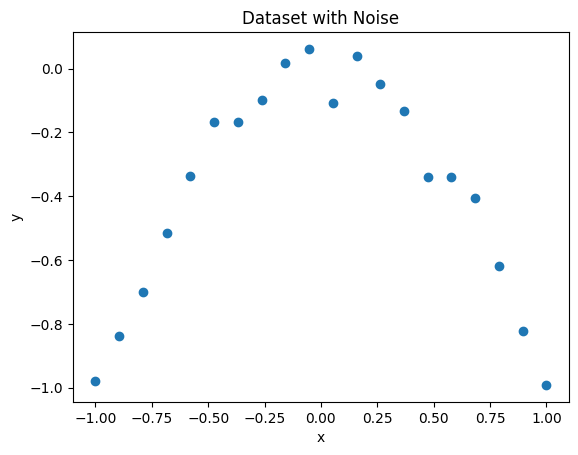

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

np.random.seed(0)
x = np.linspace(-1, 1, 20)
y = -x**2 + np.random.normal(0, 0.05, len(x))

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Dataset with Noise')
plt.show()


In [3]:
x_train, x_test = x[:12], x[12:]
y_train, y_test = y[:12], y[12:]

### Exercise 4: Fitting Polynomial Models of Different Degrees


Objective: Fit polynomial models of varying degrees and observe overfitting.
Instructions:

1. Define a function polynomial_fit that takes a degree as input and returns a polynomial that best fits the training data.
2. Define another function plot_polyfit that plots the training set, test set, and the fitted polynomial curve for a given degree.
3. Use plot_polyfit to visualize the fit for polynomials of degree 1, 7, and 11.
4. Observe how the model behaves on the training and test sets as the degree of the polynomial increases.

In [33]:
def polynomial_fit(degree):
    return np.poly1d(np.polyfit(x_train, y_train, degree))

def plot_polyfit(degree):
    poly = polynomial_fit(degree)
    plt.plot(x_train, y_train, 'o', label='Training Data')
    plt.plot(x_test, y_test, 'o', label='Test Data')
    x_range = np.linspace(-1, 1, 100)
    plt.plot(x_range, poly(x_range), label=f'Degree {degree}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Polynomial Fit (Degree {degree})')
    plt.legend()
    plt.show()

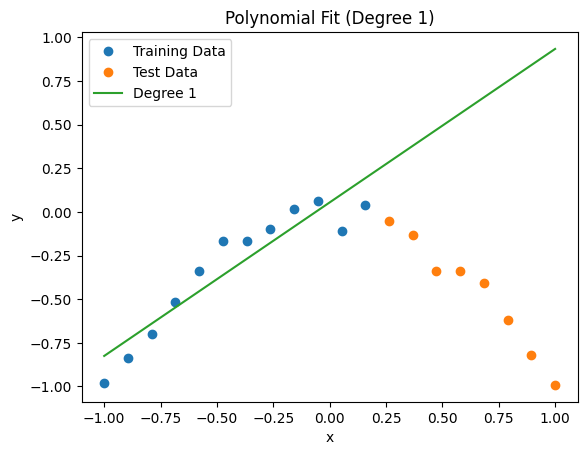

In [26]:
plot_polyfit(1)

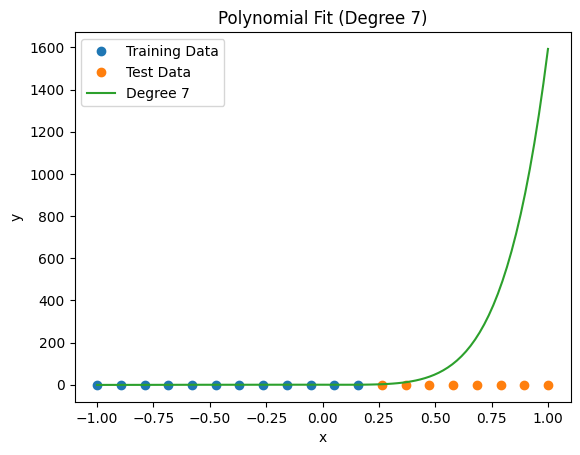

In [29]:
plot_polyfit(7)


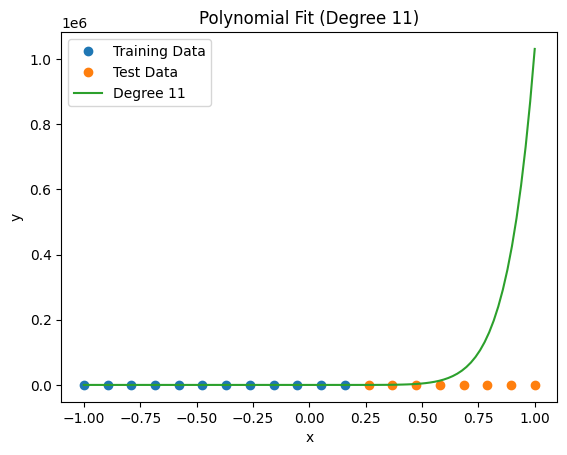

In [30]:
plot_polyfit(11)

As the degree increases, the model stops accurately predicting the data.

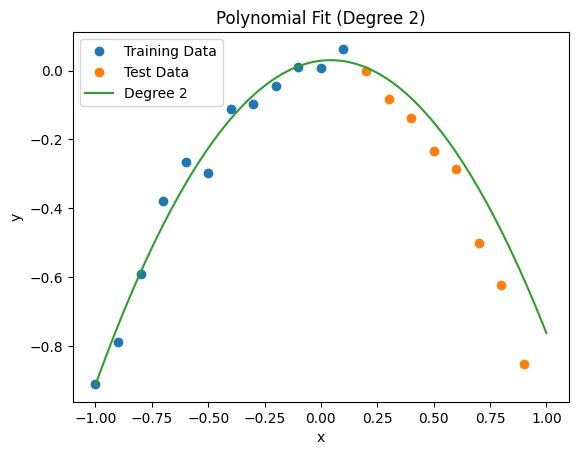

In [35]:
plot_polyfit(2)

### Exercise 5: Cross-Validation to Find the Optimal Degree


Objective: Use cross-validation to determine the best polynomial degree.
Instructions:

1. Loop through polynomial degrees from 1 to 11.
2. For each degree, calculate the Root Mean Squared Error (RMSE) for both the training and test sets.
3. Store the results (degree, RMSE for training, RMSE for test) in a list.
4. Plot the RMSE values for both the training and test sets against the polynomial degree using a logarithmic scale for the y-axis.
5. Identify the degree that minimizes the RMSE on the test set and confirm that it corresponds to the true underlying model (( y = -x^2 )).

Degree: 1, RMSE Train: 0.1002263344864799, RMSE Test: 1.0240708833556866
Degree: 2, RMSE Train: 0.04114590494650985, RMSE Test: 0.12578064282386534
Degree: 3, RMSE Train: 0.037336922311085964, RMSE Test: 0.769651993080075
Degree: 4, RMSE Train: 0.036838255960545095, RMSE Test: 1.7002332378196494
Degree: 5, RMSE Train: 0.0349421332801646, RMSE Test: 6.206938234879088
Degree: 6, RMSE Train: 0.028371907578331385, RMSE Test: 58.827475107844975
Degree: 7, RMSE Train: 0.02813358078129314, RMSE Test: 3.8190487976445913
Degree: 8, RMSE Train: 0.02755626969402102, RMSE Test: 523.816993147139
Degree: 9, RMSE Train: 0.020865492496255883, RMSE Test: 10165.845298797678
Degree: 10, RMSE Train: 0.02059885546163505, RMSE Test: 25560.431510207138
Degree: 11, RMSE Train: 2.0918613099178806e-10, RMSE Test: 1014649.5229598249


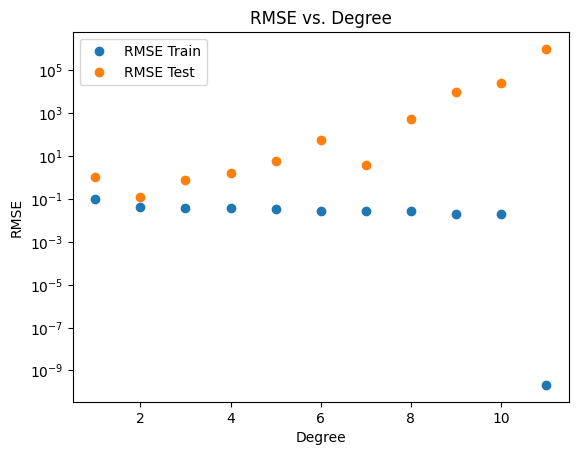

In [43]:
rmse_Test = []
rmse_Train = []
for degree in range(1, 12):
  poly = polynomial_fit(degree)
  rmse_train =  np.sqrt(mean_squared_error(y_train, poly(x_train)))
  rmse_test = np.sqrt(mean_squared_error(y_test, poly(x_test)))
  rmse_Train.append(rmse_train)
  rmse_Test.append(rmse_test)
  print(f"Degree: {degree}, RMSE Train: {rmse_train}, RMSE Test: {rmse_test}")
plt.plot(range(1, 12), rmse_Train, 'o',label='RMSE Train')
plt.plot(range(1, 12), rmse_Test, 'o',label='RMSE Test')
plt.yscale('log')
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.title('RMSE vs. Degree')
plt.legend()
plt.show()

As expected, the degree that minimizes the RMSE is 2, because we were plotting a parabolic function.